In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import fileinput

In [2]:
source_dir = "../outputs/ergotropy/"

In [3]:
sigma_list = np.linspace(0.1,10,100)
tlist = np.linspace(-4, 4, 8000)

In [4]:
in_one_photon = np.loadtxt(source_dir+"input_one_photon_1.dat")
excited_atom = np.loadtxt(source_dir+"excited_atom_1.dat")
gs_atom = np.loadtxt(source_dir+"gs_atom_1.dat")

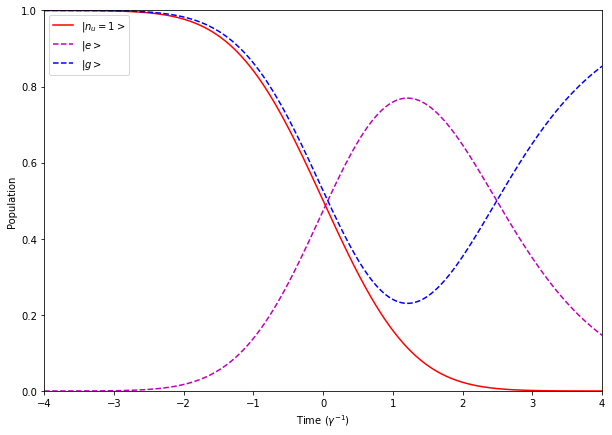

In [5]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(tlist, in_one_photon, '-r', label='$|n_{u}=1>$')
ax.plot(tlist, excited_atom, '--m', label='$|e>$')
ax.plot(tlist, gs_atom, '--b', label='$|g>$')
ax.set_xlim(-4,4)
ax.set_xlabel('Time ($\gamma^{-1}$)')
ax.set_ylim(0,1)
ax.set_ylabel('Population')
ax.legend()

plt.show()

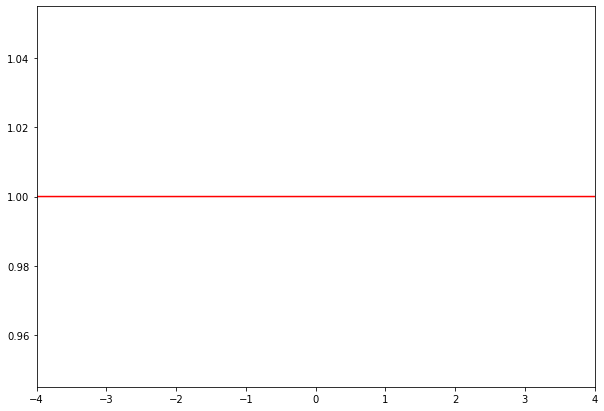

In [6]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(tlist, excited_atom+gs_atom, '-r')
ax.set_xlim(-4,4)
#ax.set_ylim(0,1)


plt.show()

In [7]:
source_dir = "../outputs/ergotropy/max_gaussian/"

In [8]:
max_erg_fock1 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_1/ergotropy*.dat"))))
max_ene_fock1 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_1/energy*.dat"))))
max_pow_fock1 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_1/power*.dat"))))

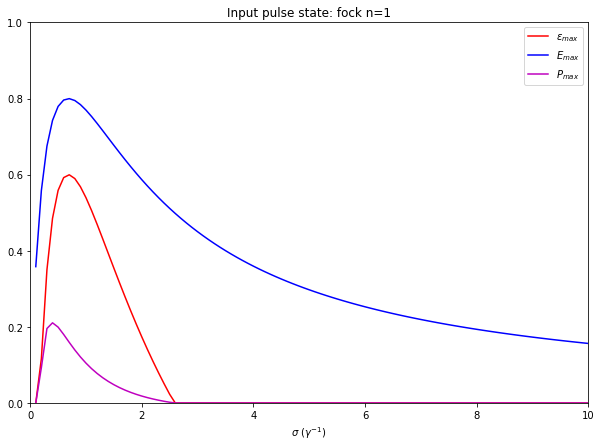

In [9]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(sigma_list, max_erg_fock1, '-r', label='$\epsilon_{max}$')
ax.plot(sigma_list, max_ene_fock1, '-b', label='$E_{max}$')
ax.plot(sigma_list, max_pow_fock1, '-m', label='$P_{max}$')

ax.set_xlim(0,10)
ax.set_ylim(0,1)
#ax.set_ylabel('Max Ergotropy')
ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')

ax.set_title('Input pulse state: fock n=1')
ax.legend()

plt.show()

In [10]:
sorted(glob.glob(source_dir + "fock_2/ergotropy*.dat"))

['../outputs/ergotropy/max_gaussian/fock_2/ergotropy_0.1_5.0.dat',
 '../outputs/ergotropy/max_gaussian/fock_2/ergotropy_5.1_7.5.dat',
 '../outputs/ergotropy/max_gaussian/fock_2/ergotropy_7.6_9.0.dat',
 '../outputs/ergotropy/max_gaussian/fock_2/ergotropy_9.1_10.0.dat']

In [11]:
max_erg_fock2 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_2/ergotropy*.dat"))))
max_ene_fock2 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_2/energy*.dat"))))
max_pow_fock2 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_2/power*.dat"))))

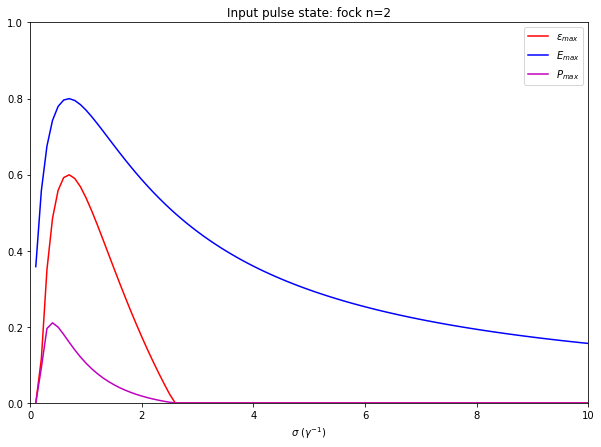

In [12]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(sigma_list, max_erg_fock2, '-r', label='$\epsilon_{max}$')
ax.plot(sigma_list, max_ene_fock2, '-b', label='$E_{max}$')
ax.plot(sigma_list, max_pow_fock2, '-m', label='$P_{max}$')

ax.set_xlim(0,10)
ax.set_ylim(0,1)
#ax.set_ylabel('Max Ergotropy')
ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')

ax.set_title('Input pulse state: fock n=2')
ax.legend()

plt.show()

In [13]:
sorted(glob.glob(source_dir + "fock_3/ergotropy*.dat"))

['../outputs/ergotropy/max_gaussian/fock_3/ergotropy_0.1_5.0.dat',
 '../outputs/ergotropy/max_gaussian/fock_3/ergotropy_5.1_7.5.dat',
 '../outputs/ergotropy/max_gaussian/fock_3/ergotropy_7.6_9.0.dat',
 '../outputs/ergotropy/max_gaussian/fock_3/ergotropy_9.1_10.0.dat']

In [14]:
max_erg_fock3 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_3/ergotropy*.dat"))))
max_ene_fock3 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_3/energy*.dat"))))
max_pow_fock3 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_3/power*.dat"))))

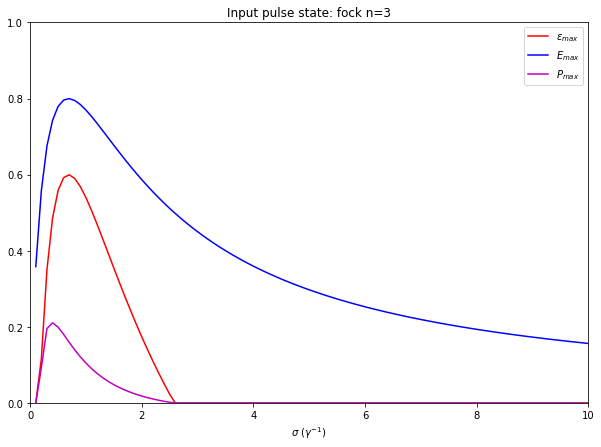

In [15]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(sigma_list, max_erg_fock3, '-r', label='$\epsilon_{max}$')
ax.plot(sigma_list, max_ene_fock3, '-b', label='$E_{max}$')
ax.plot(sigma_list, max_pow_fock3, '-m', label='$P_{max}$')

ax.set_xlim(0,10)
ax.set_ylim(0,1)
#ax.set_ylabel('Max Ergotropy')
ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')

ax.set_title('Input pulse state: fock n=3')
ax.legend()

plt.show()

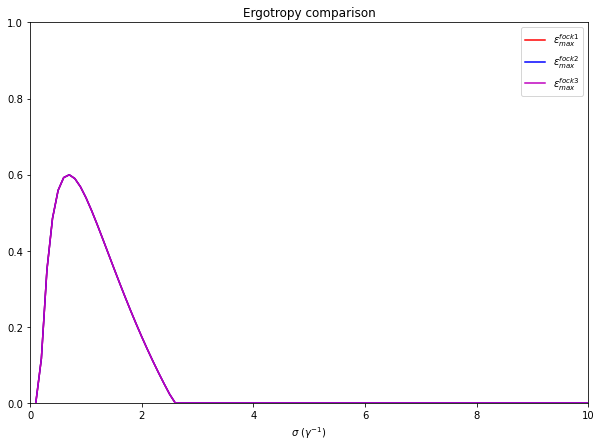

In [16]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(sigma_list, max_erg_fock1, '-r', label='$\epsilon_{max}^{fock1}$')
ax.plot(sigma_list, max_erg_fock2, '-b', label='$\epsilon_{max}^{fock2}$')
ax.plot(sigma_list, max_erg_fock3, '-m', label='$\epsilon_{max}^{fock3}$')

ax.set_xlim(0,10)
ax.set_ylim(0,1)
#ax.set_ylabel('Max Ergotropy')
ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')

ax.set_title('Ergotropy comparison')
ax.legend()

plt.show()

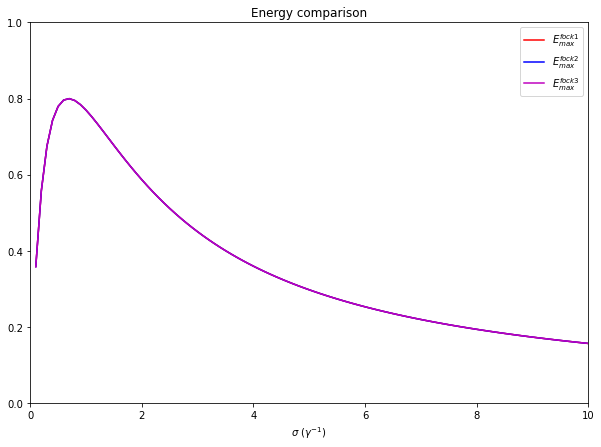

In [17]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(sigma_list, max_ene_fock1, '-r', label='$E_{max}^{fock1}$')
ax.plot(sigma_list, max_ene_fock2, '-b', label='$E_{max}^{fock2}$')
ax.plot(sigma_list, max_ene_fock3, '-m', label='$E_{max}^{fock3}$')

ax.set_xlim(0,10)
ax.set_ylim(0,1)
#ax.set_ylabel('Max Ergotropy')
ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')

ax.set_title('Energy comparison')
ax.legend()

plt.show()

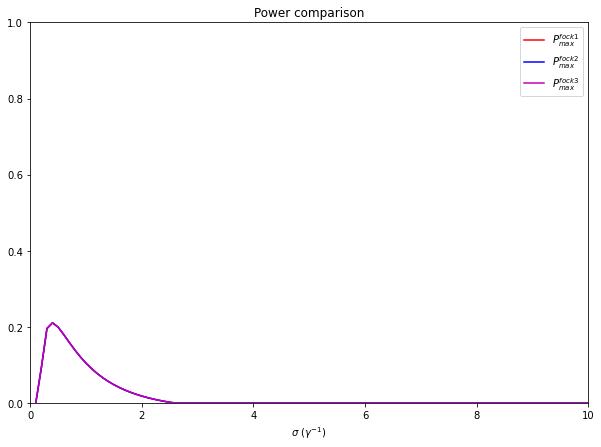

In [18]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(sigma_list, max_pow_fock1, '-r', label='$P_{max}^{fock1}$')
ax.plot(sigma_list, max_pow_fock2, '-b', label='$P_{max}^{fock2}$')
ax.plot(sigma_list, max_pow_fock3, '-m', label='$P_{max}^{fock3}$')

ax.set_xlim(0,10)
ax.set_ylim(0,1)
#ax.set_ylabel('Max Ergotropy')
ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')

ax.set_title('Power comparison')
ax.legend()

plt.show()

In [19]:
gas_pur = np.loadtxt("../outputs/ergotropy/gaussian_purity_1.0.dat")
gas_erg = np.loadtxt("../outputs/ergotropy/gaussian_ergotropy_1.0.dat")
gas_ene = np.loadtxt("../outputs/ergotropy/gaussian_energy_1.0.dat")

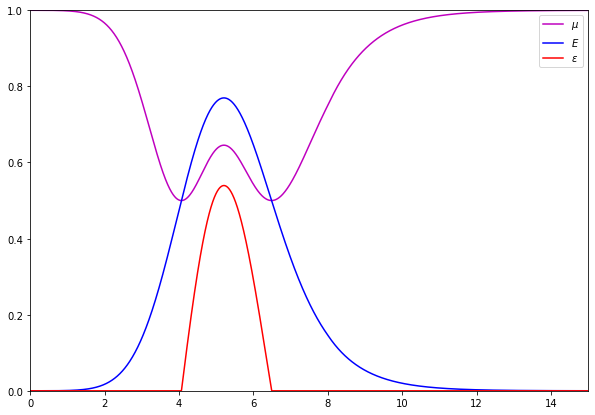

In [20]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(gas_pur[:,0], gas_pur[:,1], '-m', label='$\mu$')
ax.plot(gas_ene[:,0], gas_ene[:,1], '-b', label='$E$')
ax.plot(gas_erg[:,0], gas_erg[:,1], '-r', label='$\epsilon$')

ax.set_xlim(0,15)
ax.set_ylim(0,1)

ax.legend()

plt.show()